In [156]:
# 일반 회원들의 sequence 추출

# 이슈 회원들의 sequence 추출

# 일반 회원과 이슈 회원을 SID(x-axis), Support(y-axis) 별로 비교

In [157]:
# 글로벌 하게 사용할 객체 선언

# sid corpus
sid_list = {}
sid_index = 0

# SDB (temporary memory storage)
sdb = []

In [158]:
# Load the data
import csv
import pandas as pd

# Non issue users
no_issue_seq_data = pd.read_csv('./data/IP_SPLIT_NO_ISSUE_USERS_SEQ.csv')
# Issue users
issue_seq_data = pd.read_csv('./data/IP_SPLIT_ISSUE_USERS_SEQ.csv')

In [159]:
# Data of the non issue users
no_issue_seq_data.head(10)

,ID,IP,SEQUENCE_PARSE
0,1,119.67.115,"<76,77,73,24,21,21,78,161,101,152,100,152,59,1..."
1,2,211.104.55,"<161,24,24,161,24,161,101,152,100,152,161,4,16..."
2,3,1.235.19,"<161,78,80,76,77,73,27,101,150,100,150,106,80,..."
3,4,66.249.69,"<161,4,161,4,161,4,161,4,161,4,161,4,161,4,161..."
4,5,46.229.168,<161>
5,6,211.39.150,"<161,4,161,4,161,4,161,4,161,4,161,4,161,4,161..."
6,7,103.67.235,<161>
7,8,66.249.75,"<161,157,161,4,161,4,161,4,161,4,161,4,161,4,1..."
8,9,115.139.19,"<161,152,78,80,161,78,80>"
9,10,159.203.125,<161>


In [160]:
# Note. 현재 데이터가 유니크하게 존재하지 않는 문제가 있음 
# Data of the issue users
issue_seq_data.head(10)

,ID,userId,TEMP_IP_SPLIT2,SEQUENCE_PARSE
0,1,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
1,2,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
2,3,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
3,4,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
4,5,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
5,6,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
6,7,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
7,8,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
8,9,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
9,10,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."


In [161]:
# 이슈 데이터의 중복된 userId row 는 삭제
issue_seq_data.drop_duplicates(['userId'], keep='last')

,ID,userId,TEMP_IP_SPLIT2,SEQUENCE_PARSE
119,120,21353,223.62.212,"<102,101,103,154,115,115,103,115,154,115,102,1..."
155,156,18116,175.212.239,"<148,107,148,148,113,114,148,120,119,118,121,1..."
253,254,23624,223.33.165,"<116,116>"
371,372,25989,61.79.184,"<116,103,115,89,107,103,115,154,115,148,103,11..."
430,431,12518,203.237.172,"<133,148,83,83,85,81,84,102,101,102,101,148,10..."
672,673,18758,175.223.35,"<134,90,90,138,90,90,90,138,90,90,90,138,90,90..."
775,776,28751,117.111.3,"<138,107,103,115,154,115>"
805,806,13536,218.38.164,"<133,102,101,102,101,102,101,102,101,103,115,8..."
846,847,25517,220.118.22,"<102,101,148,148,113,114,148,113,114,148,113,1..."
1018,1019,20824,115.143.44,"<148,89,84,138,89,89,86,138,86,89,89,148,148,8..."


In [162]:
issue_seq_data.head(10)

,ID,userId,TEMP_IP_SPLIT2,SEQUENCE_PARSE
0,1,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
1,2,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
2,3,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
3,4,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
4,5,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
5,6,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
6,7,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
7,8,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
8,9,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."
9,10,21353,211.188.192,"<102,101,103,154,115,115,103,115,154,115,102,1..."


In [163]:
# 시퀸스의 시작, 종료 토큰을 제외한 아이템을 콤마(',') 를 기준으로 분리하여
# 아이템 배열을 만들어서 리턴해준다
def sequence_tokenize(seq):
    return seq.replace('<', '').replace('>', '').split(',')

In [164]:
# bi, tri 등 어떤 ngram 을 만들지와 시퀸스 하나를 받아
# ngram dictionary 를 만들어서 리턴해준다
def extract_ngram(n, seq_items):
    result = []
    for idx, item in enumerate(seq_items):
        window_set = seq_items[idx:idx + n]
        if len(window_set) == n:
            result.append(','.join([str(x) for x in window_set]))
    return result

In [165]:
from collections import defaultdict

# 전에 data set 을 받아 ngram 을 만들어 리턴
def extract_ngram_set(n, seq_datas):
    # 아직 나타나지 않은 ngram 을 0 값에서 시작시키기 위해 디폴트 값을 사용
    result = defaultdict(int)
    for index, row in seq_datas.iterrows():
        # ngram 을 추출
        ngram = extract_ngram(n, sequence_tokenize(row['SEQUENCE_PARSE']))
        # ngram dictionary 에 저장
        for item in ngram:
            result[item] += 1
    return pd.DataFrame(result.items(), columns=['sequence', 'support'])

In [166]:
# 글로벌 sdb 에 추출한 시퀸스들을 등록하는 함수
# def save_to_sdb(list, type='normal'):
    

In [167]:
# 매개변수로 전달된 시퀸스의 SID 를 리턴하는 함수
def get_sid(sequence):
    global sid_list
    global sid_index
    if sequence in sid_list:
        return sid_list[sequence]
    else:
        sid_list[sequence] = sid_index
        sid_index += 1
        return sid_list[sequence]

In [168]:
# 비-이슈 회원들의 ngram 을 추출
normal_ngram = extract_ngram_set(4, no_issue_seq_data)
# 가장 많이 나타나는 패턴 순으로 확인하기 위해 support 값 순으로 정렬
normal_ngram.sort_values(['support'], ascending=[False]).head(10)

,sequence,support
35498,"161,4,161,4",230406
30826,"4,161,4,161",229401
9496,"29,150,29,150",91296
2257,"150,29,150,29",80369
6192,"30,152,30,152",56668
25506,"150,150,29,150",56239
18259,"150,29,150,150",51046
26365,"152,30,152,30",50917
40587,"101,152,100,152",37296
42247,"150,150,150,150",37261


In [169]:
# SID 를 부여
normal_ngram = pd.DataFrame(normal_ngram)
normal_ngram['SID'] = 0
normal_sid = []
for index, row in normal_ngram.iterrows():
    normal_sid.append(get_sid(row['sequence']))
normal_ngram['SID'] = pd.Series(normal_sid)

In [170]:
normal_ngram_support_sum = normal_ngram['support'].sum()
normal_ngram['relSupport'] = normal_ngram['support'] / normal_ngram_support_sum
normal_ngram.head(10)

,sequence,support,SID,relSupport
0,"100,97,76,161",1,0,4.162587e-07
1,"13,161,28,161",1,1,4.162587e-07
2,"59,30,152,147",1,2,4.162587e-07
3,"152,97,97,152",1,3,4.162587e-07
4,"152,161,59,30",1,4,4.162587e-07
5,"161,78,11,147",2,5,8.325175e-07
6,"21,23,161,23",2,6,8.325175e-07
7,"152,50,28,101",3,7,1.248776e-06
8,"152,97,97,150",1,8,4.162587e-07
9,"150,161,32,101",1,9,4.162587e-07


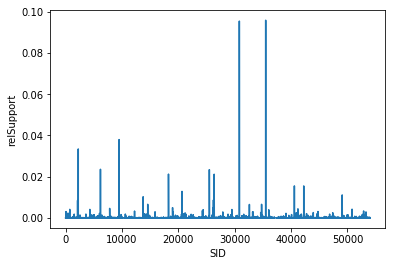

In [171]:
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

normal_ngram = normal_ngram.sort_values(['SID'], ascending=[True])

x = normal_ngram['SID']
y = normal_ngram['relSupport']

plt.xlabel('SID')
plt.ylabel('relSupport')

plt.plot(x, y)
plt.show()

In [172]:
# 이슈 회원들의 ngram 을 추출
issue_ngram = extract_ngram_set(4, issue_seq_data)
# 가장 많이 나타나는 패턴 순으로 확인하기 위해 support 값 순으로 정렬
issue_ngram.sort_values(['support'], ascending=[False]).head(10)

,sequence,support
17,"103,103,103,103",8558
404,"102,101,102,101",7328
129,"148,113,114,148",5933
477,"148,148,113,114",5500
13,"102,101,103,115",5098
289,"103,115,154,115",4777
376,"102,101,103,103",4668
482,"101,102,101,102",3593
485,"101,103,103,103",3112
191,"103,103,102,101",3112


In [173]:
issue_ngram = pd.DataFrame(issue_ngram)
issue_ngram['SID'] = 0
issue_sid = []
for index, row in issue_ngram.iterrows():
    issue_sid.append(get_sid(row['sequence']))
issue_ngram['SID'] = pd.Series(issue_sid)

In [174]:
issue_ngram_support_sum = issue_ngram['support'].sum()
issue_ngram['relSupport'] = issue_ngram['support'] / issue_ngram_support_sum
issue_ngram.head(10)

,sequence,support,SID,relSupport
0,"138,86,89,89",106,53984,0.000490
1,"124,101,102,102",389,53985,0.001798
2,"116,148,113,114",826,53986,0.003818
3,"74,82,89,138",106,53987,0.000490
4,"116,116,148,148",778,53988,0.003596
5,"101,103,115,103",811,53989,0.003748
6,"101,103,115,102",60,53990,0.000277
7,"101,112,74,148",197,53991,0.000911
8,"82,138,89,102",197,53992,0.000911
9,"103,148,89,148",389,53993,0.001798


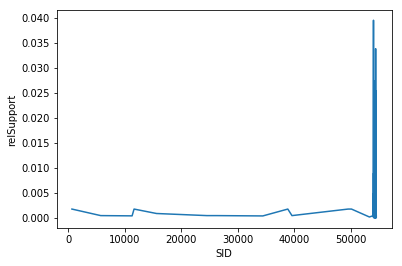

In [175]:
issue_ngram = issue_ngram.sort_values(['SID'], ascending=[True])

x = issue_ngram['SID']
y = issue_ngram['relSupport']

plt.xlabel('SID')
plt.ylabel('relSupport')

plt.plot(x, y)
plt.show()

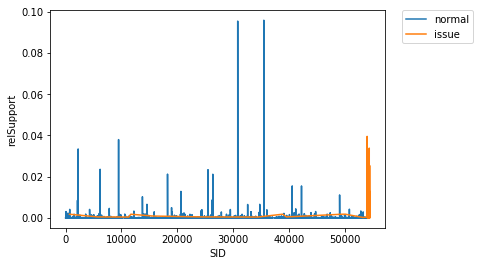

In [176]:
n_x = normal_ngram['SID']
n_y = normal_ngram['relSupport']

i_x = issue_ngram['SID']
i_y = issue_ngram['relSupport']

plt.xlabel('SID')
plt.ylabel('relSupport')

plt.plot(n_x, n_y, label='normal')
plt.plot(i_x, i_y, label='issue')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()